Pacing data fitting

In [1]:
using ModelingToolkit
using OrdinaryDiffEq
using Plots
using CSV
using DataFrames
using CaMKIIModel
using CaMKIIModel: second
Plots.default(lw=1.5)

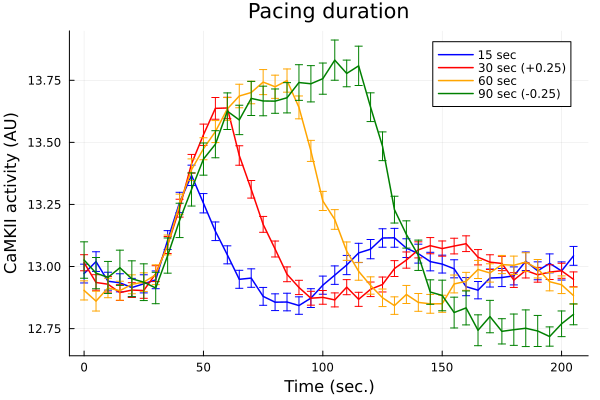

In [2]:
sys = build_neonatal_ecc_sys(simplify=true, reduce_iso=true, reduce_camk=true)
tend = 500.0second
prob = ODEProblem(sys, [], tend)
stimstart = 100.0second
stimend = 300.0second
@unpack Istim = sys
alg = TRBDF2()

# Pacing duration and CaMKII activity
durationdf = CSV.read(joinpath(@__DIR__, "data/CaMKAR-duration.csv"), DataFrame)
ts = durationdf[!, "Time(sec)"]
fifteen = durationdf[!, "1Hz 15sec (Mean)"]
fifteen_error = durationdf[!, "1Hz 15sec (SD)"] ./ sqrt.(durationdf[!, "1Hz 15sec (N)"])
thirty = durationdf[!, "1Hz 30sec (Mean)"] .+ 0.25
thirty_error = durationdf[!, "1Hz 30sec (SD)"] ./ sqrt.(durationdf[!, "1Hz 30sec (N)"])
sixty = durationdf[!, "1Hz 60sec (Mean)"]
sixty_error = durationdf[!, "1Hz 60sec (SD)"] ./ sqrt.(durationdf[!, "1Hz 60sec (N)"])
ninety = durationdf[!, "1Hz 90sec (Mean)"] .- 0.25
ninety_error = durationdf[!, "1Hz 90sec (SD)"] ./ sqrt.(durationdf[!, "1Hz 90sec (N)"])

plot(ts, fifteen, yerr=fifteen_error, lab="15 sec", color=:blue, markerstrokecolor=:blue)
plot!(ts, thirty, yerr=thirty_error, lab="30 sec (+0.25)", color=:red, markerstrokecolor=:red)
plot!(ts, sixty, yerr=sixty_error, lab="60 sec", color=:orange, markerstrokecolor=:orange)
plot!(ts, ninety, yerr=ninety_error, lab="90 sec (-0.25)", color=:green, markerstrokecolor=:green)
plot!(title="Pacing duration", xlabel="Time (sec.)", ylabel="CaMKII activity (AU)")

Simulation

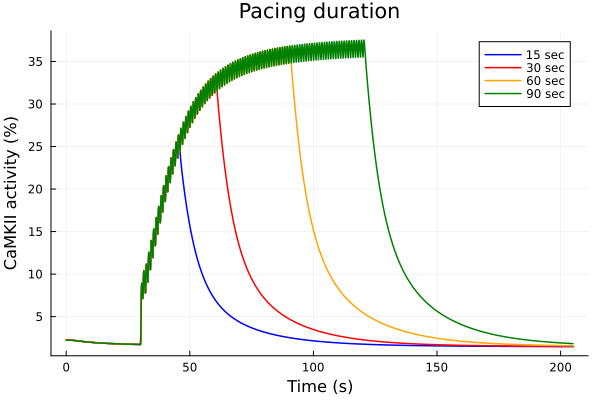

In [3]:
stimstart = 30.0second
callback15 = build_stim_callbacks(Istim, stimstart + 15second; period=1second, starttime=stimstart)
sol15 = solve(prob, alg; callback=callback15)
callback30 = build_stim_callbacks(Istim, stimstart + 30second; period=1second, starttime=stimstart)
sol30 = solve(prob, alg; callback=callback30)
callback60 = build_stim_callbacks(Istim, stimstart + 60second; period=1second, starttime=stimstart)
sol60 = solve(prob, alg; callback=callback60)
callback90 = build_stim_callbacks(Istim, stimstart + 90second; period=1second, starttime=stimstart)
sol90 = solve(prob, alg; callback=callback90)
idxs=(sys.t/1000, sys.CaMKAct * 100)

plot(sol15, idxs=idxs, tspan=(0second, 205second), lab="15 sec", color=:blue)
plot!(sol30, idxs=idxs, tspan=(0second, 205second), lab="30 sec", color=:red)
plot!(sol60, idxs=idxs, tspan=(0second, 205second), lab="60 sec", color=:orange)
plot!(sol90, idxs=idxs, tspan=(0second, 205second), lab="90 sec", color=:green)
plot!(title="Pacing duration", xlabel="Time (s)", ylabel="CaMKII activity (%)")

## Pacing frequency and CaMKII activity

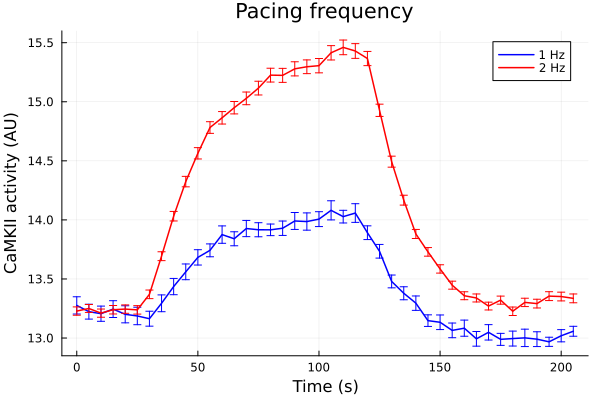

In [4]:
freqdf = CSV.read(joinpath(@__DIR__, "data/CaMKAR-freq.csv"), DataFrame)
ts = 0:5:205
onehz = freqdf[!, "1Hz (Mean)"]
onehz_error = freqdf[!, "1Hz (SD)"] ./ sqrt.(freqdf[!, "1Hz (N)"])
twohz = freqdf[!, "2Hz (Mean)"]
twohz_error = freqdf[!, "2Hz (SD)"] ./ sqrt.(freqdf[!, "2Hz (N)"])

plot(ts, onehz, yerr=onehz_error, lab="1 Hz", color=:blue, markerstrokecolor=:blue)
plot!(ts, twohz, yerr=twohz_error, lab="2 Hz", color=:red, markerstrokecolor=:red)
plot!(title="Pacing frequency", xlabel="Time (s)", ylabel="CaMKII activity (AU)")

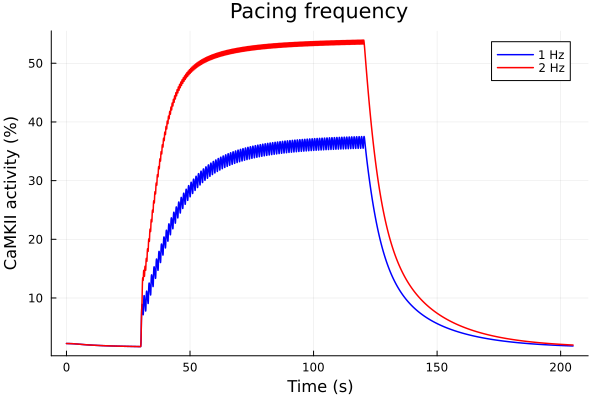

In [5]:
tend = 205.0second
prob = ODEProblem(sys, [], tend)
stimstart = 30.0second
stimend = 120.0second
callback = build_stim_callbacks(Istim, stimend; period=1second, starttime=stimstart)
sol1 = solve(prob, alg; callback)

callback2 = build_stim_callbacks(Istim, stimend; period=0.5second, starttime=stimstart)
sol2 = solve(prob, alg; callback=callback2)
idxs=(sys.t/1000, sys.CaMKAct * 100)

plot(sol1, idxs=idxs, lab="1 Hz", color=:blue)
plot!(sol2, idxs=idxs, lab="2 Hz", color=:red)
plot!(title="Pacing frequency", xlabel="Time (s)", ylabel="CaMKII activity (%)")

---

*This notebook was generated using [Literate.jl](https://github.com/fredrikekre/Literate.jl).*